<a href="https://colab.research.google.com/github/toufga-soufian/Churn-Modeling/blob/main/Data%20exploration%20and%20model%20building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objectif du projet :** modéliser le taux de désabonnement : trouver les clients qui vont potentiellement se désouscrire de leur abonnement

**I - Exploration de données**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
data = pd.read_csv("/content/drive/My Drive/0 - ML Projects/P2 churn modeling/P2-dataset.csv")
print(data.head)

<bound method NDFrame.head of       RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary Exited
0             1    15634602   Hargrave  ...               1       101348.88      1
1             2    15647311       Hill  ...               1       112542.58      0
2             3    15619304       Onio  ...               0       113931.57      1
3             4    15701354       Boni  ...               0        93826.63      0
4             5    15737888   Mitchell  ...               1        79084.10      0
...         ...         ...        ...  ...             ...             ...    ...
9995       9996    15606229   Obijiaku  ...               0        96270.64      0
9996       9997    15569892  Johnstone  ...               1       101699.77      0
9997       9998    15584532        Liu  ...               1        42085.58      1
9998       9999    15682355  Sabbatini  ...               0        92888.52      1
9999      10000    15628319     Walker  ...              

On peut voir que le dataset dispose de 10 000 lignes et de 14 colonnes, on va voir les noms des features en détails

In [3]:
print(data.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [4]:
print(data.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


On peut d'ores et déja éliminer certaines features jugèes inutiles pour prédire le désabonnement potentiel d'un client : RowNumber, CustomerID, Surname
  

In [5]:
data.drop(['RowNumber', 'CustomerId','Surname'], axis=1, inplace=True)


In [6]:
print(data.isna().any())
print(data.isnull().any())

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool


On peut vérifier s'il y a des valeurs manquantes :



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


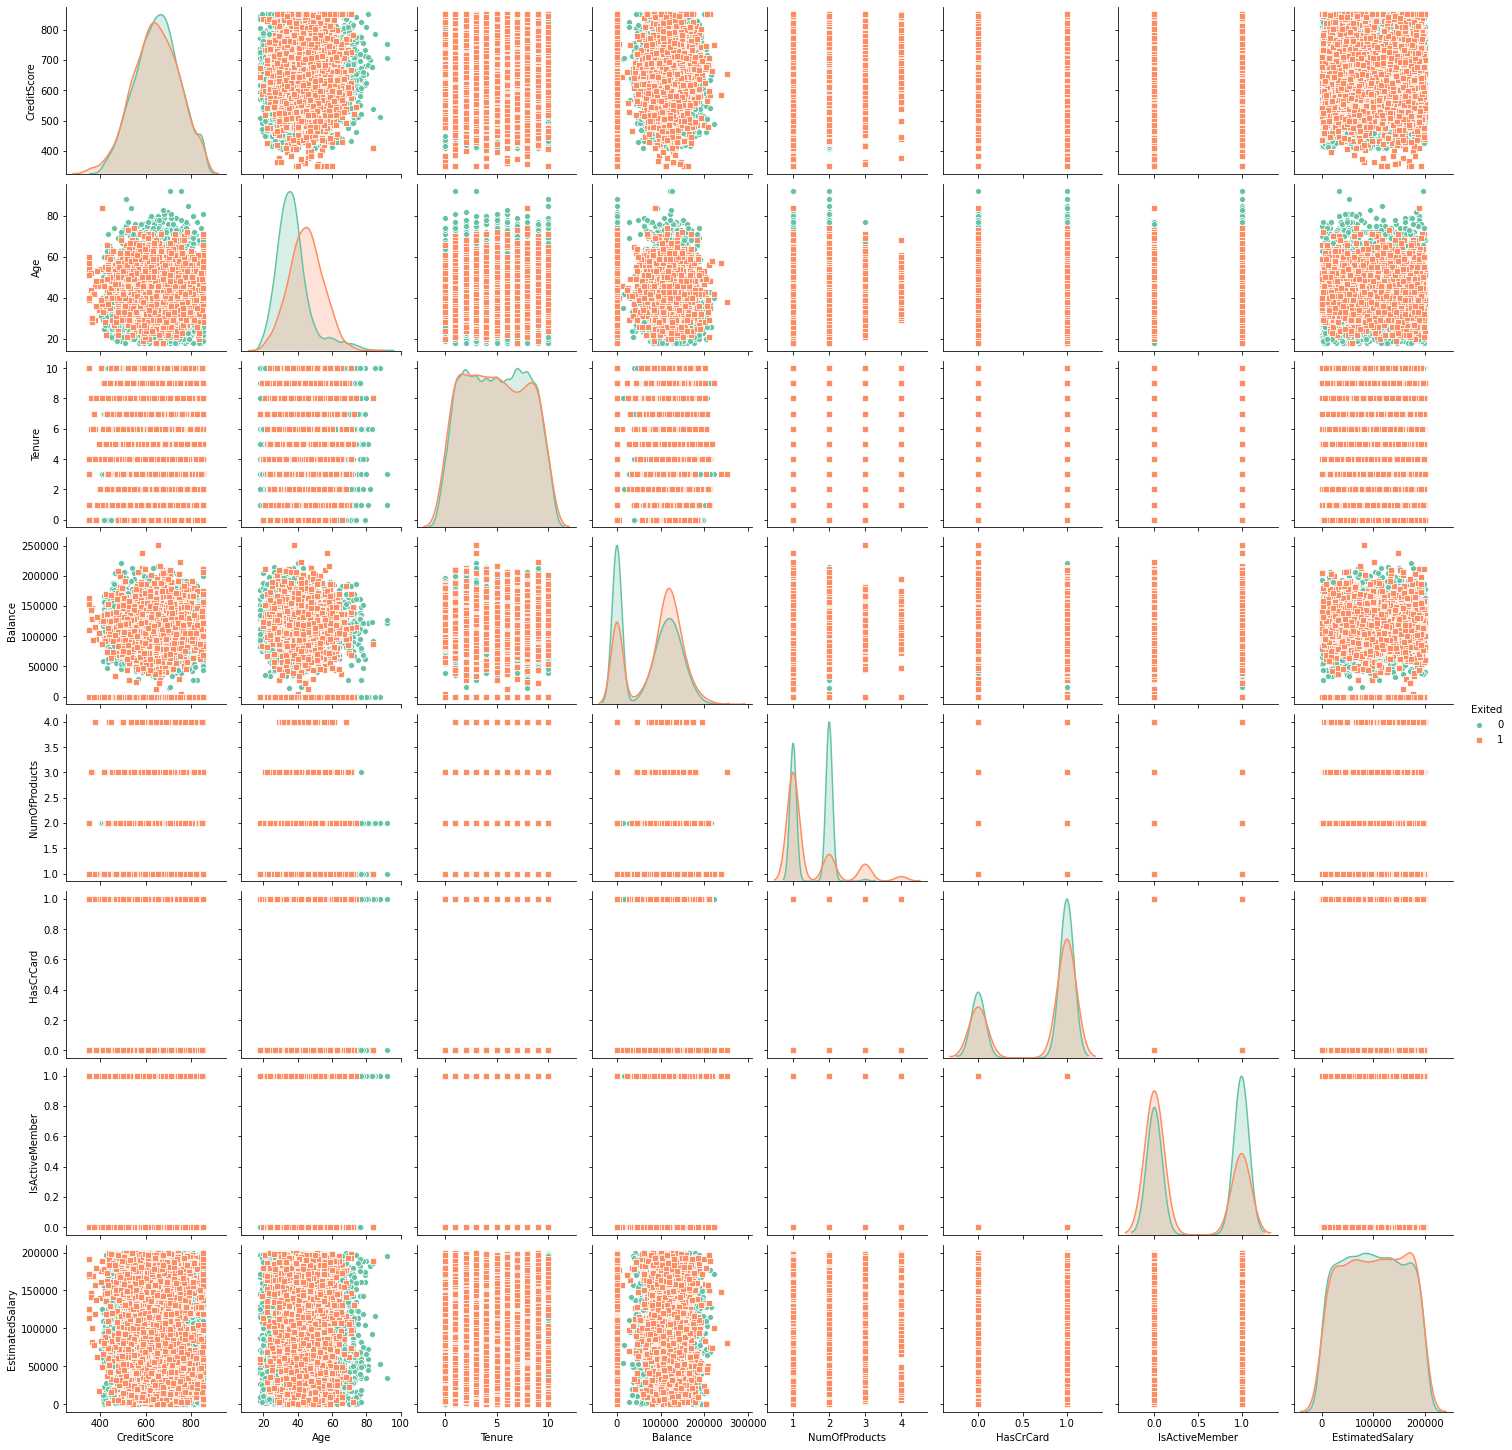

In [7]:
import seaborn as sns 
sns.pairplot(data, kind="scatter", hue="Exited", markers=["o", "s"], palette="Set2")
plt.show()

On peut voir la distribution des variables en fonction de la valeur de la valeur qu'on cherche à prédire (Exited). Pour certaines features la distribution est presque la meme pour les deux cas, que ça soit désabonnement ou non (1 ou 0 respectivement), par exemple "EstimatedSalary", "Creditscore" et "Tenure". Alors que pour d'autres features, on peut voir quelques petites tendances qui se dégagent , par exemple pour la feature "NumberofProducts", lorsqu'elle égal à 2 les clients ont tendance à rester. On peut voir ça en détails




In [8]:
select_data = data.loc[(data['NumOfProducts'] == 2)]
exited = select_data['Exited']
exited.value_counts()

0    4242
1     348
Name: Exited, dtype: int64

Etant donné que nous disposons d'un nombre réduit de feature, nous n'éliminrons aucun feature en avance, Par contre nous procédons à une analyse durant l'analyse de performances.

Comme dernière étape, nous effectuons une **conversion des varialbes qualitatives ** ensuite, nous divisons notre jeu de données en deux parties, une qui servira pour l'entrainement et une autre pour le test.

In [9]:
# Dependent and Independant Variables 
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [10]:
# Codage de la variable ualitative Gender

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [11]:
# Codage de la variable qualitative Geograpgy

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [21]:
X = np.asarray(X).astype(np.float32)

On peut voir que pour la colonne **Gender** Female est codé avec un 0 et Male avec un 1. De meme pour la colonne **Geography** France est codé par 100 et Spain par 001 alors que Germany avec 010. 


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**II - Model Building**

Je vais tester d'abord R.F étant son caractère ensemble learning 


In [13]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 0)
model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [14]:
model.predict([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]) # 

array([0.06])

On évalue les perfs du modèle avec les params par défaut

In [15]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[1871  120]
 [ 231  278]]


0.8596

Hyper params tuning

In [16]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
# criterion = ['entropy', 'gini']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 15, 20, 25, 30]
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
              #  'criterion' : criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# HyperParameters Tuning using K-fold Cross-Validation
from pprint import pprint
pprint(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state=0)
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train, y_train)

print(rf_random.best_params_)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12],
 'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(n_estimators=1788, min_samples_split=30, min_samples_leaf=1, max_features= 'sqrt', max_depth= 110, bootstrap = False, random_state = 0)
model = RandomForestRegressor(bootstrap= True, max_depth = 110, max_features='sqrt', min_samples_leaf= 2, min_samples_split= 15, n_estimators= 1500)
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

On peut voir qu'après le calibbrage des hyperparams on améliore la prédiction de 0.85 à 0.86 

In [ ]:
model.feature_importances_

In [ ]:
data.columns

On peut voir que la feature la plus importante selon le modèle RF est : **Age** (0.31), **NumberOfProducts** (0.24) et le score **Balance** (0.11)

On va tester avec un modèle ANN pour voir si on peut atteindre une précision plus que 87% atteinte par le modèle RF après tunning des HyperParams

In [31]:
#  Initializing the ANN
import tensorflow as tf
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Part 3 - Training the ANN

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 260)

Epoch 1/260
235/235 [==============================] - 0s 1ms/step - loss: 1030.5800 - accuracy: 0.5581
Epoch 2/260
235/235 [==============================] - 0s 1ms/step - loss: 33.8601 - accuracy: 0.6829
Epoch 3/260
235/235 [==============================] - 0s 1ms/step - loss: 17.2673 - accuracy: 0.7025
Epoch 4/260
235/235 [==============================] - 0s 1ms/step - loss: 15.6574 - accuracy: 0.6975
Epoch 5/260
235/235 [==============================] - 0s 1ms/step - loss: 8.4864 - accuracy: 0.6992
Epoch 6/260
235/235 [==============================] - 0s 1ms/step - loss: 6.8331 - accuracy: 0.6907
Epoch 7/260
235/235 [==============================] - 0s 1ms/step - loss: 5.0318 - accuracy: 0.6951
Epoch 8/260
235/235 [==============================] - 0s 1ms/step - loss: 7.6789 - accuracy: 0.6924
Epoch 9/260
235/235 [==============================] - 0s 1ms/step - loss: 5.5451 - accuracy: 0.6957
Epoch 10/260
235/235 [==============================] - 0s 1ms/step - loss: 5.8461 - 

In [32]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[1991    0]
 [ 509    0]]


0.7964